+ 感知机对偶形式算法步骤
![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1553575213207&di=72e2138e1a5de7af5dc2224d7294bccc&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FjXQJ6b7CBHrsdDkJxVIV0lGMnzRtm1esvtuxUibicP1dmLf5klicFjeIT0E3qkUgTmW9LMfObW5JdzNxbb2daBk2w%2F640%3Fwx_fmt%3Djpeg)

In [1]:
import pandas as pd 
import numpy as np 

+ 加载数据

In [2]:
data = pd.read_csv('./data.csv')
data.head()

,x1,x2,label
0,0,14,-1
1,-1,5,1
2,-1,7,-1
3,-1,7,-1
4,0,11,-1


In [3]:
data['x1'].max(),data['x2'].max()

(3, 15)

+ 分离数据

In [4]:
y = data['label'] #pandas.series
X=data.drop(columns=['label']) #DataFrame

+ 定义Gram对偶形式中训练实例以内积形式出现，为了方便，可以预先将训练集中实例间的内积计算出来并存在矩阵形式计算出来

In [5]:
Gram = []
for i in range(len(X)):
    x1 = X.loc[i,'x1']
    x2 = X.loc[i,'x2']
    for j in range(len(X)):
        val =  x1*X.loc[j,'x1']+x2*X.loc[j,'x2']
        Gram.append(val)
Gram = np.reshape(Gram,[len(X),-1])

+ 定义一些变量

In [6]:
data_nums = len(X)
w = []
alpha = [0]*data_nums
b =0
ita = 0.001

+ 迭代训练过程，对应算法步骤的（2）~（4）步

In [7]:
maxepoll = 20000 #最大训练轮数
step = 0
while step < maxepoll:
    #print("step is {0}".format(step))
    i = 0
    while i < data_nums:
        res = y[i]*(sum(np.multiply(alpha,np.multiply(np.array(y.tolist()),Gram[i])))+b)#遇到分类错误情况则迭代参数
        if res <=0:
            alpha[i] += ita
            b += ita*y[i]
            break 
        i +=1
    if i == data_nums:
        break
    step +=1
print("after {0} steps training".format(step))

after 20000 steps training


+ 计算w

In [8]:
w = np.multiply(alpha,y.tolist())
w = np.dot(w.T,X.values)
w

array([ 0.004, -0.019])

In [9]:
b

0.1380000000000001

+ 做预测

In [10]:
pred = np.dot(X.values,w)
pred = [x + b for x in pred]
pred = [1 if x>0 else -1 for x in pred]

+ 计算正确率

In [11]:
count = 0
for i in range(data_nums):
    if y[i]==pred[i]:
        count+=1
print("accuracy is {0}".format(count/data_nums))

accuracy is 0.93


+ 画分类边界线

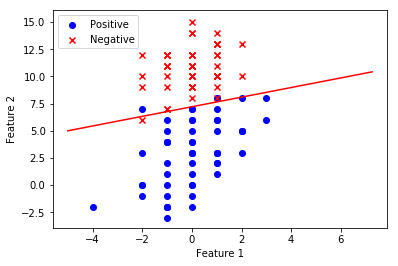

In [13]:
import matplotlib.pyplot as plt
#由于特征只有两种，分类边界线是直线，可以只取两点画线
# 直线第一个坐标（x1_1，x2_1）
x1_1 = -5
x2_1 = -1 / w[1] * (b+ w[0] * x1)
# 直线第二个坐标（x1_2，x2_2）
x1_2 = 5
x2_2 = -1 / w[1] * (b+ w[0] * x2)
# 作图
plt.scatter(data.loc[data['label']>0,'x1'].values, data.loc[data['label']>0,'x2'].values, color='blue', marker='o', label='Positive')
plt.scatter(data.loc[data['label']<0,'x1'].values, data.loc[data['label']<0,'x2'].values, color='red', marker='x', label='Negative')
plt.plot([x1_1,x2_1], [x1_2,x2_2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()